0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ


Text(0.5,1,'JC3D')

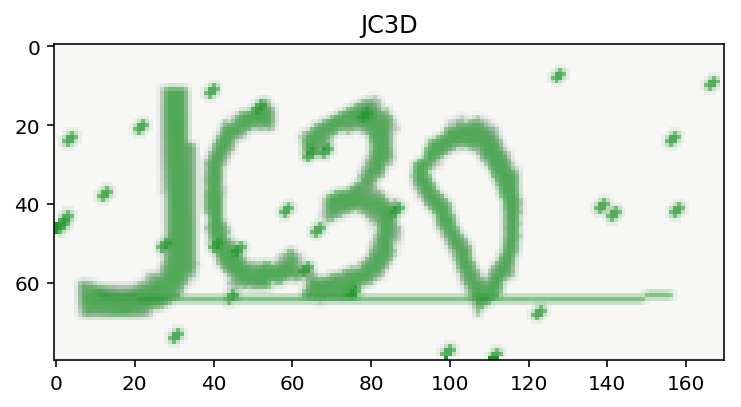

In [6]:

# generate captcha image
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline
%config InlineBackend.figure_format = "retina"

import string
characters = string.digits + string.ascii_uppercase
print(characters)

width, height, n_len , n_class = 170, 80, 4, len(characters)

generator = ImageCaptcha(width=width, height=height)
random_str =  ''.join([random.choice(characters) for j in range(4)])
img = generator.generate_image(random_str)

plt.imshow(img)
plt.title(random_str)

Text(0.5,1,'I7O4')

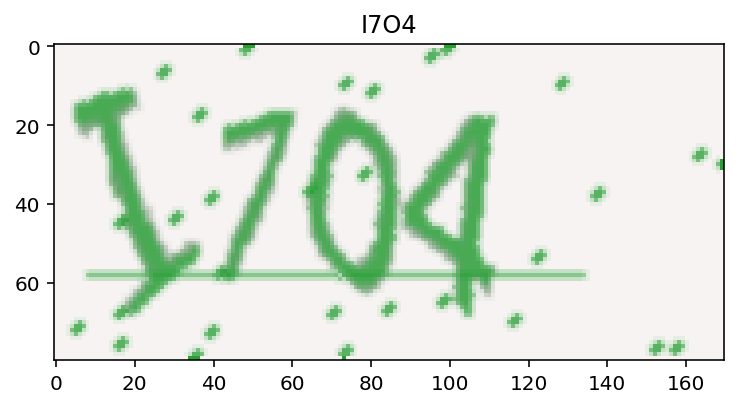

In [12]:
# data generator
def gen(batch_size = 32):
        x = np.zeros((batch_size, height, width, 3), dtype = np.uint8)
        y = [np.zeros((batch_size, n_class), dtype= np.uint8) for i in range(n_len)]
        generator = ImageCaptcha(width = width, height = height)
        while True:
                for  i  in  range(batch_size):
                        random_str = ''.join([random.choice(characters) for  j  in range(4)])
                        x[i] = generator.generate_image(random_str)
                        for j,ch  in enumerate(random_str):
                                    y[j][i,:] = 0
                                    y[j][i, characters.find(ch)] = 1
                        yield x,y
                        
def decode(y):
        y = np.argmax(np.array(y), axis = 2)[:,0]
        return ''.join([characters[x] for  x in y])
    
X, y = next(gen(1))
plt.imshow(X[0])
plt.title(decode(y))

In [ ]:

# generate captcha image
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline
%config InlineBackend.figure_format = "retina"

import string
characters = string.digits + string.ascii_uppercase
print(characters)

width, height, n_len , n_class = 170, 80, 4, len(characters)

generator = ImageCaptcha(width=width, height=height)
random_str =  ''.join([random.choice(characters) for j in range(4)])
img = generator.generate_image(random_str)

# construct deep-learning network
from keras.models import *
from keras.layers    import *

input_tensor = Input((height, width, 3))
x  = input_tensor
for i in range(4):
        x = Convolution2D(32*2**i, 3, 3, activation = 'relu')(x)
        x = Convolution2D(32*2**i,3, 3, activation='relu')(x)
        x = MaxPooling2D((2,2))(x)
        
x = Flatten()(x)
x = Dropout(0.25)(x)
x = [Dense(n_class, activation="softmax", name="c%d"%(i+1))(x) for i in range(4)]
model = Model(input = input_tensor, output= x)
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics = ['accuracy'])

from keras.utils.vis_utils import plot_model
from IPython.display import Image
plot_model(model, to_file = "model.png", show_shapes = True)
Image('model.png')

# data generator
def gen(batch_size = 32):
        x = np.zeros((batch_size, height, width, 3), dtype = np.uint8)
        y = [np.zeros((batch_size, n_class), dtype= np.uint8) for i in range(n_len)]
        generator = ImageCaptcha(width = width, height = height)
        while True:
                for  i  in  range(batch_size):
                        random_str = ''.join([random.choice(characters) for  j  in range(4)])
                        x[i] = generator.generate_image(random_str)
                        for j,ch  in enumerate(random_str):
                                    y[j][i,:] = 0
                                    y[j][i, characters.find(ch)] = 1
                        yield x,y
# practice the model
model.fit_generator(gen(), samples_per_epoch = 51200, nb_epoch = 5, nb_worker = 2, pickle_safe = True, validation_data = gen(), nb_val_samples = 1280)

0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ


Using TensorFlow backend.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activati

Epoch 1/5
 1297/51200 [..............................] - ETA: 35:14:47 - loss: 53.3892 - c1_loss: 13.3614 - c2_loss: 13.3931 - c3_loss: 13.3402 - c4_loss: 13.2945 - c1_acc: 0.0393 - c2_acc: 0.0377 - c3_acc: 0.0403 - c4_acc: 0.0429